<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# using the Admission.csv  

[link of csv](https://github.com/teddcp/Machine-Learning-/tree/master/data-files)


Feature selection
------------------------

https://www.kaggle.com/bbloggsbott/feature-selection-correlation-and-p-value

https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

## importing libraries and data



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [171]:
# importing the data
data = pd.read_csv('/content/Admission.csv')
data.drop(columns=['Serial No.'],inplace=True)
data.rename(columns={'Admission Chance':'possibility'},inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,possibility
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [172]:
data.info()  # no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   possibility        400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [173]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,possibility
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


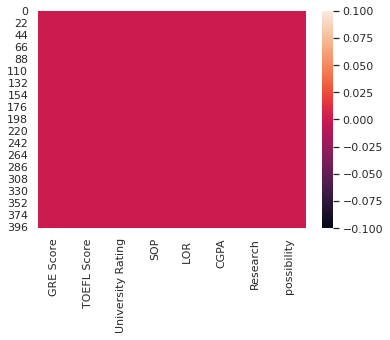

In [174]:
sns.heatmap(data.isna())  # no null value

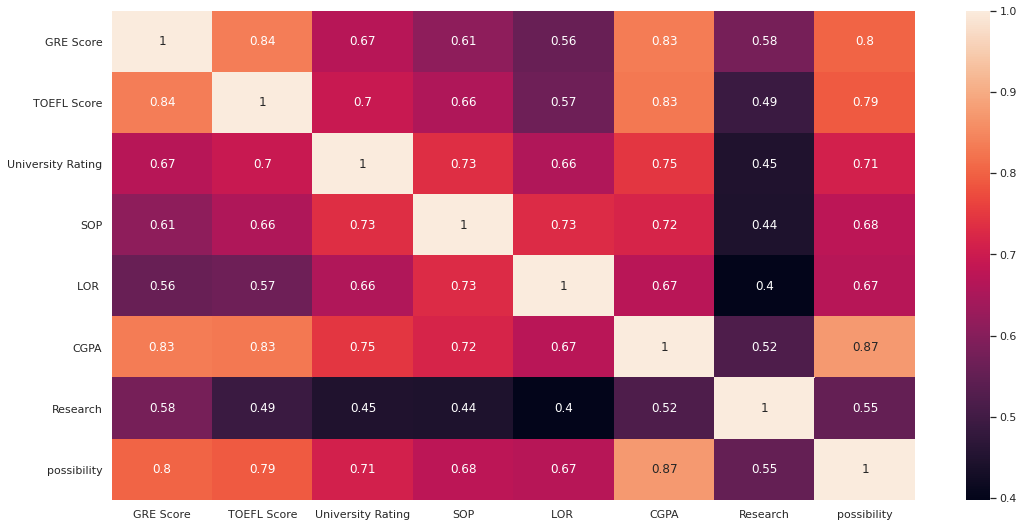

In [175]:
plt.figure(figsize = (18, 9))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [176]:
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,possibility
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
possibility,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [177]:
 np.full((corr.shape[0],), True, dtype=bool)

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)    #array([ True,  True,  True,  True,  True,  True,  True,  True])
for i in range(corr.shape[0]): 
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False

In [179]:
selected_columns = data.columns[columns]
selected_columns.shape

(7,)

In [0]:
new_data= data[selected_columns]  #Now, the dataset has only those columns with correlation less than 0.8

In [181]:
new_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [0]:
new_data.insert(len(new_data.columns),'admission_score',data['possibility'])

In [183]:
new_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admission_score
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## visualizing the data



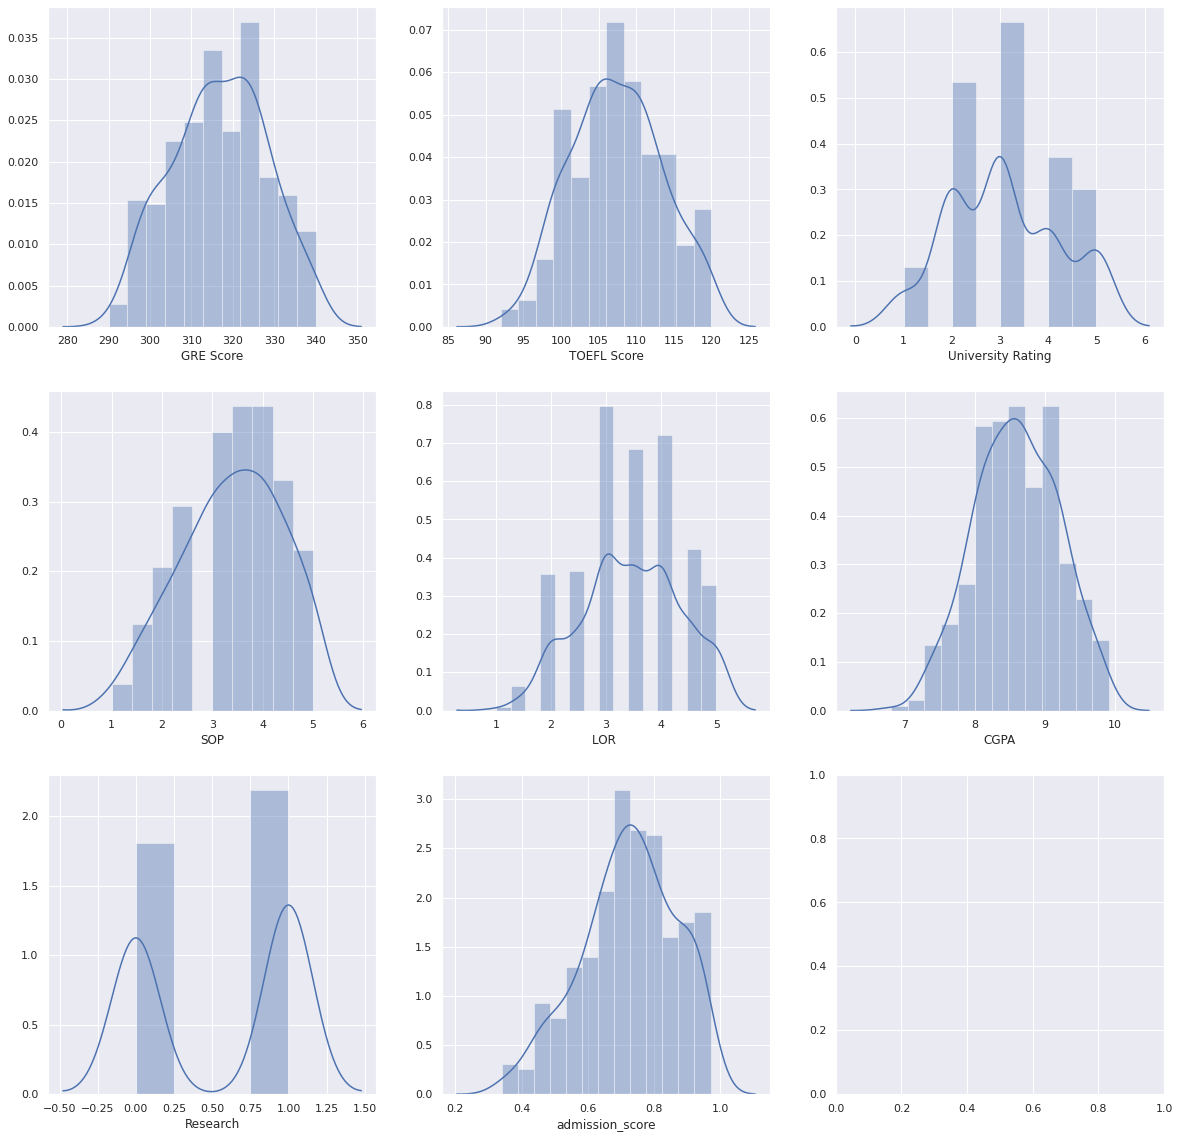

In [185]:
fig,ax=plt.subplots(3,3,figsize = (20, 20))
i=1

for col in new_data.columns :
  plt.subplot(3,3,i)
  sns.distplot(new_data[col])
  i+=1

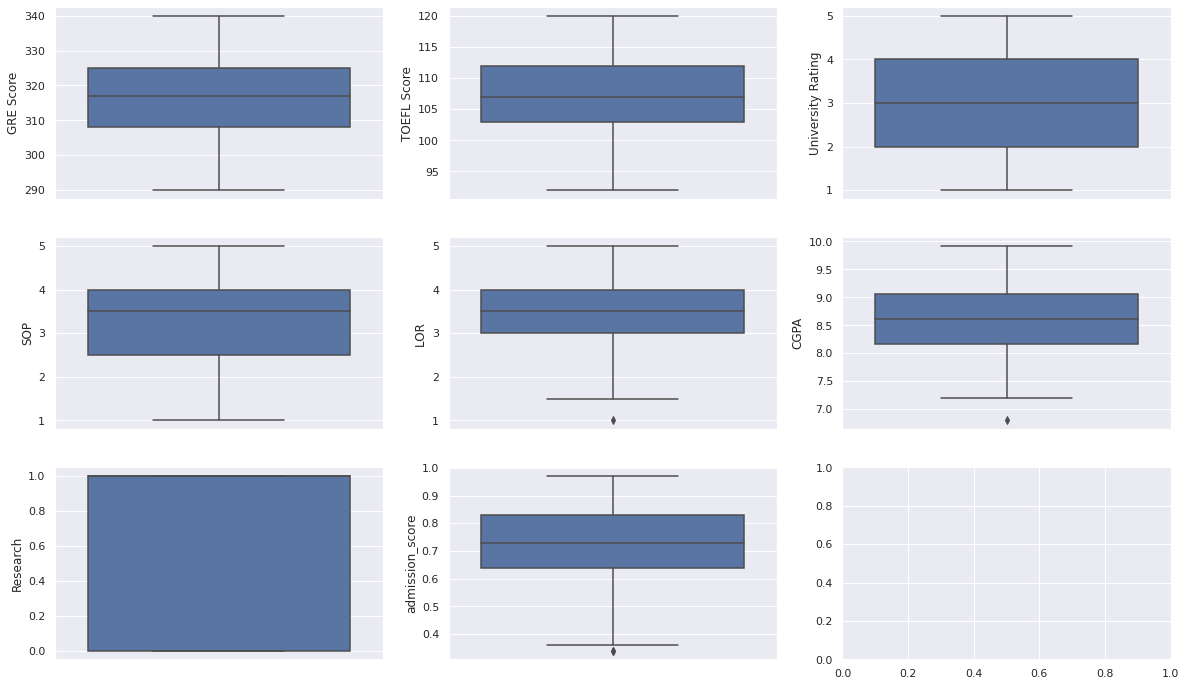

In [187]:
#boxplot

fig,arr=plt.subplots(3,3,figsize=(20,12))
k=1

for i in new_data.columns:
  plt.subplot(3,3,k)
  sns.boxplot(y=new_data[i])
  k+=1

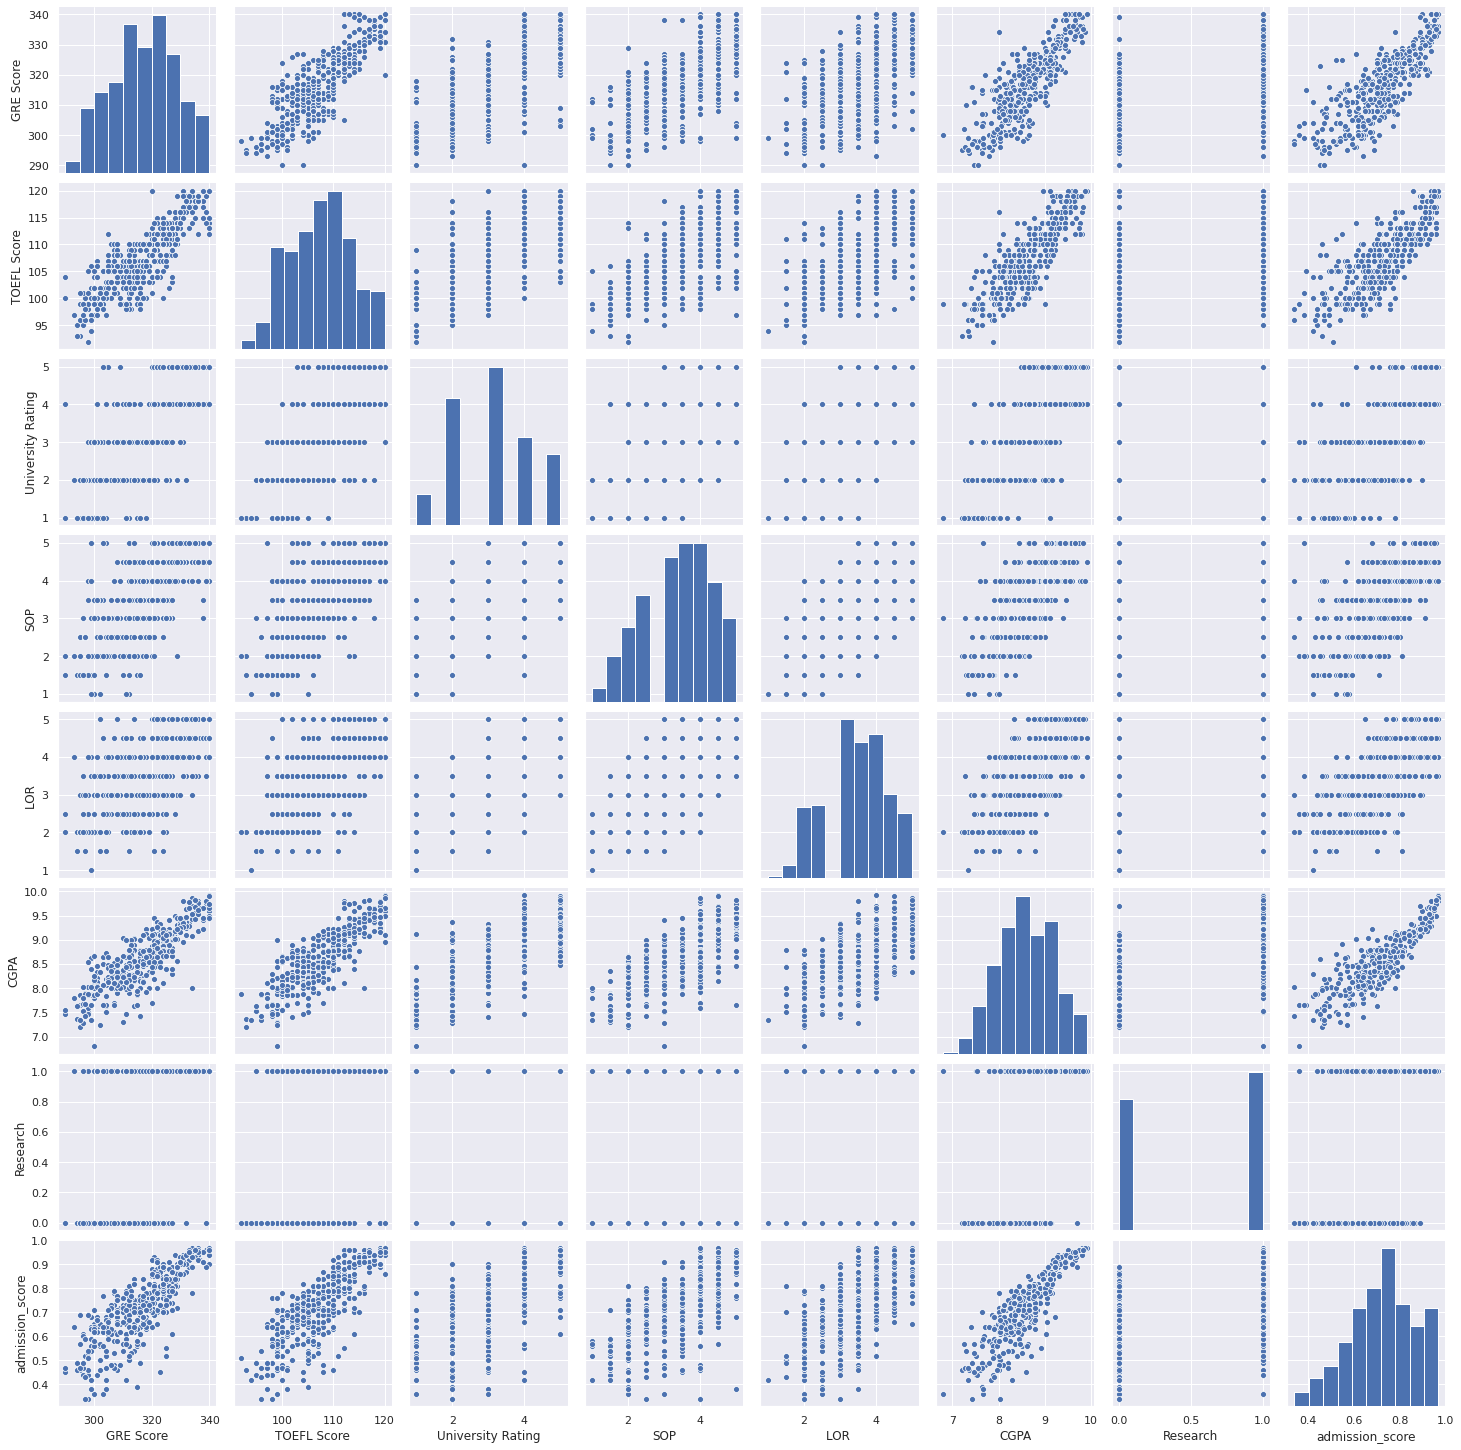

In [198]:
sns.pairplot(new_data)

## splitting data for training and testing


In [0]:
x=new_data.drop(columns=['admission_score','Research'],axis=1)
y=new_data['admission_score']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)


## training the data



In [190]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)


Linear Model Coeff (m) [0.00221542 0.0032807  0.00534892 0.00117055 0.01455708 0.11691407]
Linear Model Coeff (b) -1.4021081751206488


## testing the data



In [0]:
y_predict = regressor.predict(X_test)

Text(0.5, 0, 'True (ground truth)')

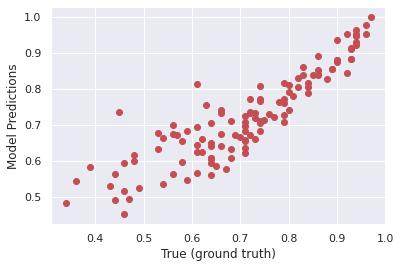

In [193]:
plt.scatter(y_test, y_predict, color = 'r')   # if it is 45 degree line. then our prediction is good
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

## evaluation of model : accuracy 

In [0]:
from sklearn.metrics import r2_score, mean_squared_error

In [195]:
np.sqrt(mean_squared_error(y_test,y_predict))

0.06947474391403607

In [196]:
 r2_score(y_test, y_predict)

0.7879588401501054

## now using a polynomial regression model

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  PolynomialFeatures as pf

model1= pf(include_bias=False,degree=2)
model2=LinearRegression(fit_intercept=True)

#making the pipeline and fitting data
pipeline=make_pipeline(model1,model2)

# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# training the data
pipeline.fit(x_train,y_train)

#predicting
pred=pipeline.predict(x_test)

In [285]:
#evalutation of model : Accuracies
r2_score(y_test,pred),np.sqrt(mean_squared_error(y_test,pred))

(0.7463139824318819, 0.07316493216951894)

# creating another Feature and implementing the same

In [288]:
new_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'admission_score'],
      dtype='object')

In [0]:
x2=new_data.loc[:,['GRE Score', 'TOEFL Score','CGPA','SOP']]
y2=new_data.loc[:,'admission_score']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=42,test_size=0.3)

In [0]:
regressor2 = LinearRegression(fit_intercept = True)
regressor2.fit(x_train, y_train)
y_pred=regressor2.predict(x_test)

In [323]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0722465428862855

In [324]:
 r2_score(y_test, y_pred)

0.7707019283972734

#Conclusions
-------------------

1. using multivariate/multiple linear regression model, we are able to achieve 78% accuracy

2. when we tried with polynomial regression model, acuuracy got decreased to 74% which indicates that it is not non-linear.

